# Week 4

Today it's a fine smorgasbord of learning about visualization, mixing lectures on the principles with more hands-on D3 fun. The topics are
* Visualization for datascience (two variables)
* Lecture on the principles of visualization (explanatory visualization)
* Working with the IDV
* As well as practical D3 examples 

 ## Part 1: Exploratory data visualzation, two variables
 
I told you how I love the *Data Analysis with Open Source Tools* book. This time, we'll read Chapter 3, which is about visualizing data with two variables.  You can get the text [here](https://www.dropbox.com/s/dgdmmaywqkk0jzq/DAOST_chapter3.pdf?dl=0).

> Exercises: DAOST chapter 3
> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

    >  *  <span style="color:blue">Visually you can draw a nice and smooth lines that goes through all the data points. If we had a lot of noise, the points would be jittered around such a line so that every datapoint had a distance $d$ from the line. The larger the noise the larger the $d$ from the points to the line describing the relationship. This distance if often what we try to minimize when doing line-fitting i.e minimize the root mean square error. </span>
    
    
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?

    >  *   <span style="color:blue"> It could be financial assets that depends differently on different input variables. For instance the plot could despict two assets, both which in the start falls in correlation with a GDP-variable but then one assets takes off because it is strongly correlated with a key number in its industry. The other asset is not in the same industry and as such is not correlated with this variable making it remain unchanged. </span>
    

> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
    >  * <span style="color:blue">The two methods</span> : 
        * Splines:We sticht piecewise polynomials together, controlling how smooth we want the curve and how close we want it to fit the data. Splines needs to be tuned to the problem at hand. One nice thing is that we can weight each datapoint, giving more weights to points that we know are accurate and less weights to those that we don't trust as much.
           * LOESS: This method is basically a local linear regression (usually), where we take all the data and weight it using a filter with a specified width before computing the linear regression. A large width means that we take a wider range of data points into consideration for the smoothed valued at our desired locationi and a smaller one means we take less. So using large kernels we get a more global trend, using a smaller one yields a more local trend. The LOESS is quite expensive because we have to filter all data with the kernel for each smoothed value that needs to be computed. 
           * Other methods could be a standard running average or exponential smoothing (smooth each value with its previous values using an exponentially decreasing weight). 
           
> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 [get it here](https://github.com/suneman/socialdataanalysis2018/blob/master/files/regrunners.pdf). And an [extra link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).

    >  *  <span style="color:blue"> The problem is, that using straigh lines (regression) we give very little weight to local changes in the data-set, we just capture the global trend. Say for instance we have 100 datapoints, the first 90 is quite steady but we begin seeing an increaing trend in the last 10. If we just use a straigh line, we would very likely undershoot new datapoints because we don't put enough wait on recent observations compared to old ones. With LOESS, we are able to capture the local trends in the data, so each point has a different weight on each section of the line where linear regression every point has the same inpact on every section of the line. Local models are highly prefeable when we have non-stationary data. </span>
    
    
> * What are residuals? Why is it a good idea to plot the residuals of your fit?

    >  *  <span style="color:blue"> Residuals are basically the remainder when you subtract the datapoints from your model, i.e subtract your estimate from the ground trouth. For an appropiate model, we would like to se symetrically and uncorrelated residuals. If you have uncorrelated residuals, the error in your model is due to noise, if you have correlated residuals it means that you have a SYSTEMATIC error in your model. So there are factors in your data-set which your model does not take into account. We should always plot the residual to both see their size but most importantly their structure. They are also usefull for outlier detection, i.e if you have a few residuals that are very far from the others it could mean that the corrosponding datapoint is an outlier in your dataset. </span>
    
    
> * Explain in your own words the point of the smooth tube in figure 3-7.

    >  *  <span style="color:blue"> It is to show both a smoothed line and also its confidence interval. The upper and lower bound of this confidence interval is made using only the datapoints with positive contributions for the upper and only residual with negative contribution for the lower bound. So in essence most the the datapoints should lie between the upper and lower confidence interval.  </span>
    
    
> * What kind of relationships will a semi-log plot help you discover?

    >  *  <span style="color:blue"> Semi-log plot will clearly show us if our data has an exponential relationship on one axis because in a semi-log plot this will be shown as a straight line. Also all relative change is shown as the same size so it is the relative change that is in focus, not the absolute. </span>
    
    
> * What kind of functions will loglog plots help you see?

    >  *  <span style="color:blue"> A loglog plot will show us power-relations as straight lines. Where the slop of the line gives us the power-factor between the variables. I.e slope 2 corresponds to y = x^2. Note that we generally use singe and double log as a tool to show data which are fat apart (spanning many magnitues) in one plot without having one section of the plot being completely dominated by larger values. And this generally happens when we have power and exponential relationships in our data, meaning that many points will confined in a small range and then there will be large gaps spanning to the biggest points in the dataset. </span>
    
    
> * What the h#ll is *banking* and what part of our visual system does it use to help us see patterns? What are potential problems with banking?

    >  *  <span style="color:blue"> Banking is the process of adjusting the size and range of your axis such that lines in the graph are at approximately 45 degrees. Humans are great at recognized slopes and lines, generally useful for estimating trajectories and so on, however very small changes in slope are hard for us to see. The difference between 1 degree and 2 degrees are very hard differentiate, but the difference between 45 and 90 degrees are no problem. The problem with banking is, that it can become too extreme, shrinking one axis to almost nothing but on the other hand we will do banking manually and not by some algorithm so we will indeed fit the axis to whatever we think represents the structure of our data the best. Also another problem is, that humans seem to prefeer the 4:3 format and banking your graph can take your graphs away from this. </span>
    
    
> * I think figure 3-14 makes an important point about linear fits that is rarely made. What is it? 

    >  *  <span style="color:blue"> The point is, that the linear fit is not the best summarizer of data but instead a good predictor of one variable in response to another. It essentially shows that you can get two different optimal fits by either fitting x as function of y, or y as function of x. So when we use regression, it should be as a means of predicting data and not as a way to summarize it.</span>
    
    
> * Summarize the discussion of *Graphical Analysis* and *Presentation Graphics* on pp. 68-69 in your own words.

    >  * <span style="color:blue"> Here he discusses the different between graphical analysis (visualizing the dataset in different ways to use the human eye to interpret pattern and correlations) and presenting the data to an audience. When we do graphical anaylsis, we seek to find an unknown structure to the answer and are therefore exploring the data. When we present it, we already know the results from previous anaylsis, not we want to communicate this result as best as possible to the reader. We need to make the graphs talk for themselves so they need as little text as possible for explaining, right font size, line thickness and so on to convery the result of our analysis. </span>

## Part 2: Explanatory data visualization

Now for more award winning lecturing on data viz. Note how that last question in the last section ties perfectly into this video. 

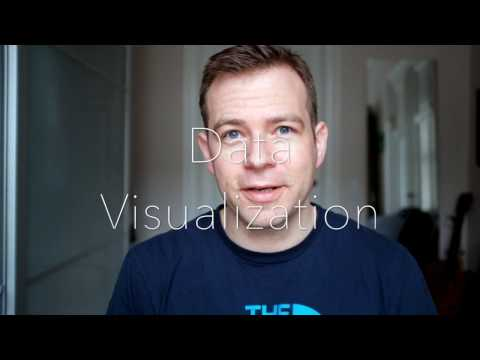

In [1]:
# Sune talks about designing visualizations.
from IPython.display import YouTubeVideo
YouTubeVideo("yHKYMGwefso",width=600, height=338)

> *Exercises*: Explanatory data visualization
> * What are the three key elements to keep in mind when you design an explanatory visualization?
> * In the video I talk about (1) *overview first*,  (2) *zoom and filter*,  (3) *details on demand*. 
>   - Go online and find a visualization that follows these principles (don't use one from the video). 
>   - Explain how it does achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.
> * Explain in your own words: How is explanatory data analysis different from exploratory data analysis?

## Part 3: Interactive Data Visualization (for the web)

Ah did you think I had forgotten about the D3 book? Nope. It's time to read again. I'm not going to repeat my instructions on how to read the book as a tutorial, but I still highly recommend it. It's time to work through chapter 10 and 11.

> Exercises: IDV chapter 11
> * Explain in your own words: Line-charts are important, so why hasn't the book covered `paths` sooner?
> * Using your brand new line-drawing skills, re-create one of the plots from http://www.tylervigen.com/spurious-correlations (I recommend preparing the data manually, most of these have only a couple of data-points). **You do not have to do fancy curvy lines, match the colors completely, tooltips, etc.** I just want you guys to try out paths on a simple little dataset. 

# Part 4: Generating your own visualization

> *Exercise*: DAOST Figure 3-5. 
> 
> The exercise for today is to recreate DAOST figure 3-5, but with data from the Boston Marathon winning times [get them here](https://en.wikipedia.org/wiki/List_of_winners_of_the_Boston_Marathon). You don't have to plot the smooth-curve approximations, it's enough to do the straight line fits.
> 
> * First get the data from wikipedia onto your computer (there are may ways to do this, from pasting the table into Excel, or your favorite WYSIWIG editor to downloading the wikipage's markdown source ... it's your choice). Or try out OpenRefine as [mentioned in the book](https://www.propublica.org/nerds/using-google-refine-for-data-cleaning). *New*: I hear this one is pretty great for extracting tables from wikipedia: http://wikitable2csv.ggor.de/.
> * You probably also want to convert the time in hours into minutes - once again there are many ways to do that. It's your choice.
> * Start by plotting the raw data. Use different symbols for men/women. Do you see the same trends as in the data used in the book?
> * Use `path` from Chapter 11 to connect the dots.
> * Add your straight-line fit. You can do this in D3, but if you'd like it's OK to calculate the fit elsewhere (Python, Matlab, R, etc) and then simply add the straight line to the plot.
 - If you want to try your luck with pure D3, you might find inspiration [in this `bl.ock`](http://bl.ocks.org/benvandyke/8459843).
> * Make sure you have a plot description, axes labels, and legend somewhere.
> * Set up the plot so you can toggle between *only women*, *only men*, *all data*, using our skills from last time.
> * Add tooltips that show the time & year, when you hover over a point, using our skills from chapter 10. Feel free to implement the tooltips any way you like.
> * Bonus (optional), also show the name of the winner corresponding to a datapoint in the tooltip.

